In [98]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from matplotlib import style
import csv

In [99]:
with open('p2p-Gnutella04.txt', 'r') as input_file:
    with open('output1.csv', 'w', newline='') as output_file:
        csv_writer = csv.writer(output_file)
        csv_writer.writerow(['FromNodeId', 'ToNodeId'])
        for line in input_file:
            values = line.strip().split('\t')
            if(len(values)==1):
              continue
            csv_writer.writerow([values[0], values[1]])

In [100]:
import csv
with open('output1.csv', 'r') as f_in:
    reader = csv.reader(f_in)
    rows = list(reader)
    rows.pop(0)

with open('output1.csv', 'w', newline='') as f_out:
    writer = csv.writer(f_out)
    writer.writerows(rows)

In [101]:
col_names=['FromNodeId','ToNodeId'] 
df=pd.read_csv("output1.csv",names=col_names)

df=df[1:]
df.head(15)

,FromNodeId,ToNodeId
1,0,1
2,0,2
3,0,3
4,0,4
5,0,5
6,0,6
7,0,7
8,0,8
9,0,9
10,0,10


In [102]:
unique_nodes= len(set(df['FromNodeId']).union(set(df['ToNodeId'])))

In [103]:
unique_nodes

10876

In [104]:
unique_nodes = np.unique(df[["FromNodeId", "ToNodeId"]].values.tolist())
unique_nodes

array(['0', '1', '10', ..., '9997', '9998', '9999'], dtype='<U5')

In [105]:
len(unique_nodes)

10876

In [106]:
testing =pd.DataFrame(0,columns = unique_nodes,index = unique_nodes)

In [107]:
testing

,0,1,10,100,1000,10000,10001,10002,10003,10004,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
num_nodes = len(unique_nodes)
adj_matrix = np.zeros((num_nodes+3, num_nodes+3))
print(adj_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [109]:
for index, row in df.iterrows():
    fr_row=int(row["FromNodeId"])
    # fr.append(fr_row)
    to_row=int(row["ToNodeId"])
    # to.append(to_row)
    adj_matrix[fr_row][to_row]=1

In [110]:
#this is the adjacency matrix
adj_matrix

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
df2=pd.DataFrame(adj_matrix)

In [112]:
df2 = df2.astype(int)
df2

,0,1,2,3,4,5,6,7,8,9,...,10869,10870,10871,10872,10873,10874,10875,10876,10877,10878
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
10875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
num_nodes = len(unique_nodes)
A = np.zeros((num_nodes, num_nodes))
for row in df.itertuples():
    testing.at[row.FromNodeId,row.ToNodeId] = 1
    
print("Weighted directed Adjacency Matrix in dataframe" + "\n")
testing

Weighted directed Adjacency Matrix in dataframe



,0,1,10,100,1000,10000,10001,10002,10003,10004,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Representing in terms of edge list**

In [114]:
#finding edge list
edge_list=[]
for index,row in df.iterrows():
    temp_list=[]
    temp_list.append(row["FromNodeId"])
    temp_list.append(row["ToNodeId"])
    edge_list.append(temp_list)

In [115]:
edge_list

[['0', '1'],
 ['0', '2'],
 ['0', '3'],
 ['0', '4'],
 ['0', '5'],
 ['0', '6'],
 ['0', '7'],
 ['0', '8'],
 ['0', '9'],
 ['0', '10'],
 ['1', '2'],
 ['1', '11'],
 ['1', '12'],
 ['1', '13'],
 ['1', '14'],
 ['1', '15'],
 ['1', '16'],
 ['1', '17'],
 ['1', '18'],
 ['1', '19'],
 ['3', '20'],
 ['3', '21'],
 ['3', '22'],
 ['3', '23'],
 ['3', '24'],
 ['3', '25'],
 ['3', '26'],
 ['3', '27'],
 ['3', '28'],
 ['3', '29'],
 ['8', '30'],
 ['8', '31'],
 ['8', '32'],
 ['8', '33'],
 ['8', '34'],
 ['8', '35'],
 ['8', '36'],
 ['8', '37'],
 ['8', '38'],
 ['8', '39'],
 ['10', '41'],
 ['10', '136'],
 ['10', '137'],
 ['10', '138'],
 ['10', '139'],
 ['10', '140'],
 ['10', '141'],
 ['10', '142'],
 ['10', '143'],
 ['10', '144'],
 ['12', '40'],
 ['12', '41'],
 ['12', '42'],
 ['12', '43'],
 ['12', '44'],
 ['12', '45'],
 ['12', '46'],
 ['12', '47'],
 ['12', '48'],
 ['12', '49'],
 ['14', '199'],
 ['14', '756'],
 ['14', '1116'],
 ['14', '2537'],
 ['14', '2787'],
 ['14', '3307'],
 ['14', '4524'],
 ['14', '4674'],
 ['14',

In [116]:
no_of_edge=len(edge_list)

**1. Number of Nodes**

In [117]:
#number of nodes
print("number of nodes -> ",len(np.unique(unique_nodes)))

number of nodes ->  10876


**2.Number of Edges**

In [118]:
#length of edge_list
print("count of edges-> ",len(edge_list))

count of edges->  39994


**3.Avg In-degree**

In [119]:
# code for finding average in degree
in_degrees = np.sum(adj_matrix, axis=1)
avg_in_deg = np.mean(in_degrees)
print("average in degree", avg_in_deg)

average in degree 3.6762570089162607


**4.Avg Out-Degree**

In [120]:
#code for finding average out degree
out_degrees = np.sum(adj_matrix, axis=0)
avg_out_deg = np.mean(out_degrees)
print("Average Out-Degree of Network:", avg_out_deg)

Average Out-Degree of Network: 3.6762570089162607


**5.Node with Max In-degree**

In [121]:
#code for finding node with maximum in degree
in_dict={}
max_in_degree=0
max_out_node=-1
for i in range (len(adj_matrix[0])):
  count=0
  for j in range(len(adj_matrix)):
    if (adj_matrix[j][i]==1):
      count+=1
  in_dict[i]=count
  if (count>max_in_degree):
    max_in_degree=count
    max_out_node=i
print("node with max in degree",max_out_node,int(max_in_degree))

node with max in degree 1054 72


**6.Node with Max out-degree**

In [122]:
#code for finding node with maximum out degree
out_dict={}
max_degree = 0
max_node = -1
for i in range(len(adj_matrix)):
    outdegree = sum(adj_matrix[i])
    out_dict[i]=outdegree
    if outdegree > max_degree:
        max_degree = outdegree
        max_node = i
print("node with max out degree",max_node,int(max_degree))



node with max out degree 3109 100


**7.The density of the network**

In [123]:
print("density of the network", no_of_edge/(len(unique_nodes)*(len(unique_nodes)-1)))

density of the network 0.0003381398671756435


**In degree distribution**

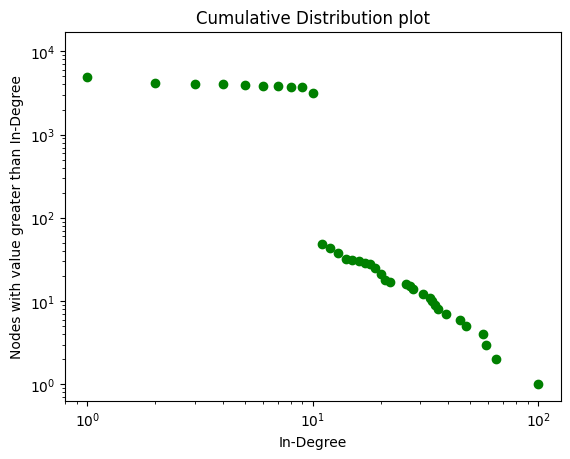

In [124]:
sequence_degree_in= sorted(in_degrees, reverse=True) 
Count_degree = collections.Counter(sequence_degree_in)
degree, count = zip(*Count_degree.items())
cs = np.cumsum(count)
plt.loglog(degree, cs, 'go')
plt.title("Cumulative Distribution plot")
plt.ylabel("Nodes with value greater than In-Degree")
plt.xlabel("In-Degree")
plt.show()

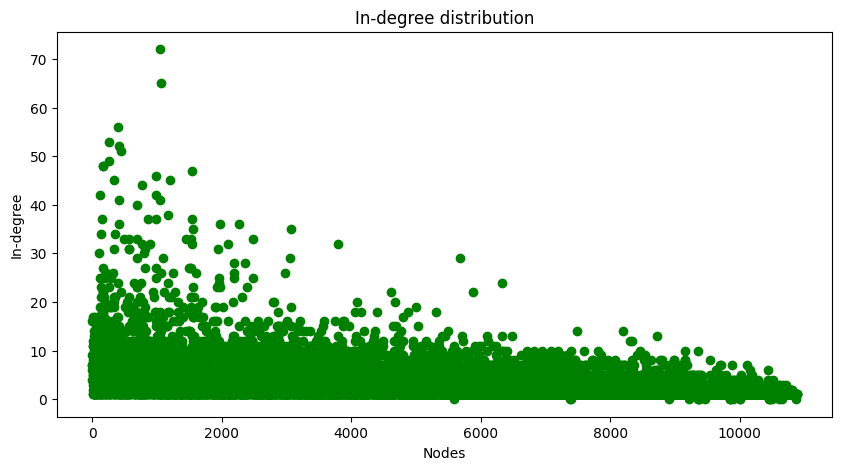

In [133]:
labels_in = list(in_dict.keys())
values_in = list(in_dict.values())
# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(labels_in, values_in, color='green')
ax.set_xlabel('Nodes')
ax.set_ylabel('In-degree')
ax.set_title('In-degree distribution')
plt.show()


**Out Degree** **Distribution**

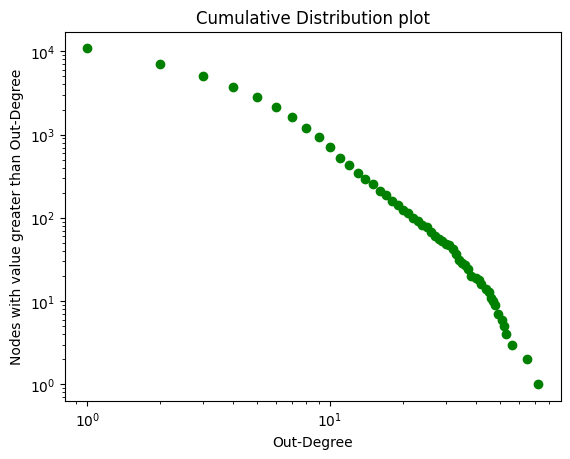

In [126]:
sequence_degree_out = sorted(out_degrees, reverse=True) 
degree_Count_Out = collections.Counter(sequence_degree_out)
degree_out, count_out = zip(*degree_Count_Out.items())
cs_out = np.cumsum(count_out)
plt.loglog(degree_out, cs_out, 'go')
plt.title("Cumulative Distribution plot")
plt.ylabel("Nodes with value greater than Out-Degree")
plt.xlabel("Out-Degree")
plt.show()

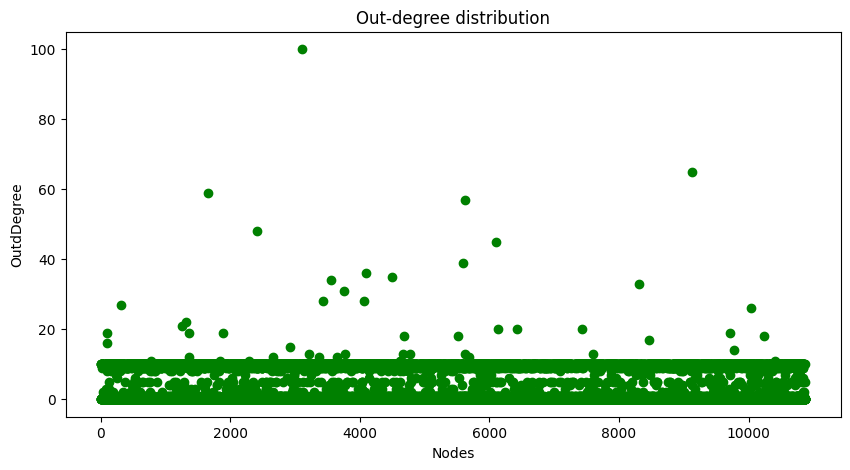

In [151]:
labels_out = list(out_dict.keys())
values_out = list(out_dict.values())
# Create scatter plot
fig, ax = plt.subplots(figsize=(14, 5))
ax.scatter(labels_out, values_out, color='green')
ax.set_xlabel('Nodes')
ax.set_ylabel('OutdDegree')
ax.set_title('Out-degree distribution')
plt.show()


**Local Clustering coeficient of each node**

In [130]:
lcc = []
for i in range(num_nodes):
    indegree_neighbors = [j for j, row in enumerate(adj_matrix) if row[i] == 1]
    outdegree_neighbors = [j for j, col in enumerate(adj_matrix[i]) if col == 1]

    list_neighbour = indegree_neighbors + outdegree_neighbors
    new_list_neighbour = list_neighbour[:]
    if len(new_list_neighbour) < 2:
        lcc.append(0)
        continue
    number_pairs = len(new_list_neighbour) * (len(new_list_neighbour) - 1)
    if number_pairs == 0:
        lcc.append(0)
        continue
    number_connected_pairs = 0
    for u in new_list_neighbour:
        for v in new_list_neighbour:
            if u == v:
                continue
            if adj_matrix[u][v] == 1:
                number_connected_pairs += 1
    cc = number_connected_pairs / number_pairs
    lcc.append(cc)


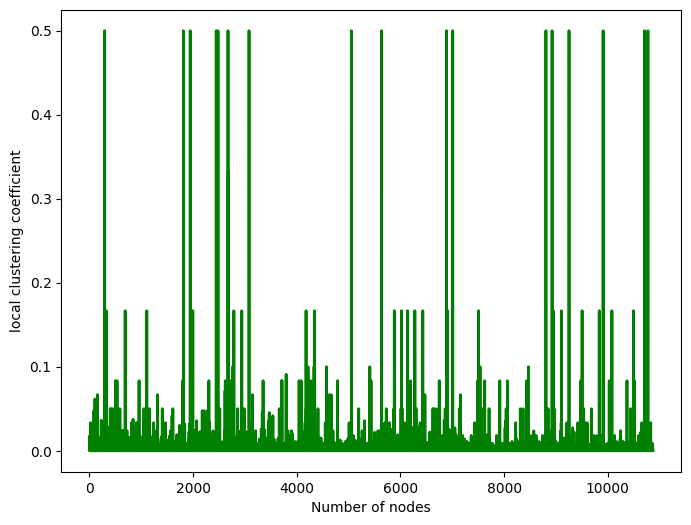

In [150]:
#Plotting
local = np.array(lcc)
fig, ax = plt.subplots(figsize =(8, 6))
plt.xlabel("Number of nodes")
plt.ylabel("local clustering coefficient")
ax.plot(local,color='g',linewidth='2')
plt.show()

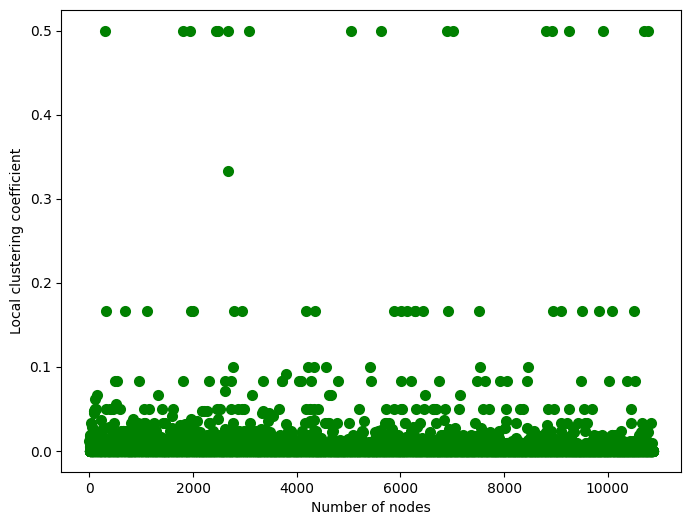

In [149]:
#scatter plot
local = np.array(lcc)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(len(local)),local, color='g', linewidth=2)
plt.xlabel("Number of nodes")
plt.ylabel("Local clustering coefficient")
plt.show()
